In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as sco
import numpy_linalg as la

In [2]:
import sl_py_tools.matplotlib_tricks as mplt
import sl_py_tools.numpy_tricks.markov as ma
import sl_py_tools.numpy_tricks.markov_param as mp

In [3]:
import complex_synapse as cs

In [4]:
from sl_py_tools.import_tricks import reload

In [5]:
np.set_printoptions(precision=1, suppress=True, linewidth=90)

In [20]:
serial = cs.SynapseMemoryModel.build(cs.builders.build_serial, 12, jmp=0.7)
cascade = cs.SynapseMemoryModel.build(cs.builders.build_cascade, 12, jmp=0.7)

In [21]:
t = la.geomspace(0.1, 1e4, 50)
serial_snr = serial.snr_exp_ave(t)
cascade_snr = cascade.snr_exp_ave(t)

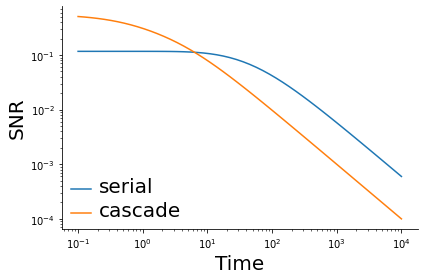

In [22]:
plt.loglog(t, serial_snr, label='serial')
plt.loglog(t, cascade_snr, label='cascade')
ax = plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("SNR")
lg = ax.legend(loc="lower left")
mplt.clean_axes(ax)

In [7]:
nst = 10
s = la.geomspace(1e-4, 10, 50)
options = {'repeats': 10, 'method': 'SLSQP'}

In [27]:
envelope_srl, models_srl = cs.optimise.optim_laplace_range(s, nst, serial=True, **options)
envelope_gen, models_gen = cs.optimise.optim_laplace_range(s, nst, serial=False, **options)

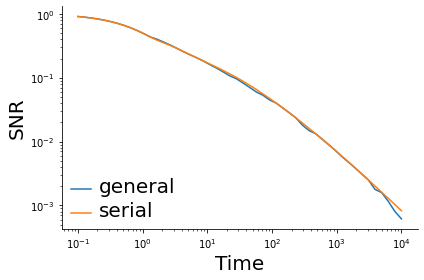

In [28]:
plt.loglog(1/s, envelope_gen * s, label='general')
plt.loglog(1/s, envelope_srl * s, label='serial')
ax = plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("SNR")
lg = ax.legend(loc="lower left")
mplt.clean_axes(ax)

In [29]:
np.savez_compressed("optim", s=s, envelope_gen=envelope_gen, envelope_srl=envelope_srl, models_gen=models_gen, models_srl=models_srl, options=options)

In [8]:
senvelope_srl, models_srl = cs.soptimise.optim_laplace_range(s, nst, serial=True, **options)
senvelope_gen, models_gen = cs.soptimise.optim_laplace_range(s, nst, serial=False, **options)

KeyboardInterrupt: 

In [ ]:
rconds = cs.optimise.check_rcond_range(s, models_gen, serial=False)
rconds

In [ ]:
s * envelope_gen

In [ ]:
cs.optimise.reoptim_laplace_range([0, 9], s, models_gen, envelope_gen, serial=False, **options)

In [8]:
reload(cs)
reload(mp)

Reloading complex_synapse.synapse_memory_model
Reloading sl_py_tools.numpy_tricks
Reloading complex_synapse.synapse_base
Reloading complex_synapse.builders
Reloading complex_synapse.synapse_opt
Reloading complex_synapse.optimise
Reloading sl_py_tools.iter_tricks
Reloading sl_py_tools.containers
Reloading sl_py_tools.display_tricks
Reloading sl_py_tools.iter_disp
Reloading sl_py_tools.range_tricks
Reloading sl_py_tools.abc_tricks
Reloading sl_py_tools.modular_arithmetic
Reloading sl_py_tools.integer_tricks
Reloading sl_py_tools.arg_tricks
Reloading sl_py_tools.slice_tricks
Reloading sl_py_tools.numpy_tricks.markov
Reloading sl_py_tools.numpy_tricks
Reloading sl_py_tools.numpy_tricks.logic
